In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("science")
from sklearn.linear_model import LinearRegression

## Polynoms

In [2]:
n = 11
x = np.arange(0, n)
poly = np.polynomial.Polynomial([1., 1., 1.])
y = poly(x) + np.random.randn(n)
poly

Polynomial([1., 1., 1.], domain=[-1,  1], window=[-1,  1], symbol='x')

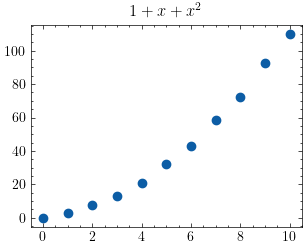

In [3]:
plt.scatter(x, y)
plt.title(r"$1 + x + x^2$")
plt.show()

## Polynomial regression

Aproximate a function by a polynom of degree n
$$p(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n$$

In [4]:
def poly_reg(N, X, Y):
    # n >= 2
    model = LinearRegression(fit_intercept=True)
    data = pd.DataFrame({"x0": np.ones(X.size), "x1": X})
    for i in range(2, N + 1):
        data["x" + str(i)] = X**i
    vars = data.columns
    data.head()
    # Fit model
    model.fit(data, Y)
    # Return polynom
    return np.polynomial.Polynomial(model.coef_)

## Fit polynoms

In [5]:
xs = np.arange(0, n, .5)
m = xs.size
ys = poly(xs) + np.random.randn(m)

In [6]:
p_1 = poly_reg(1, xs, ys)
p_1

Polynomial([ 0.        , 11.46743938], domain=[-1,  1], window=[-1,  1], symbol='x')

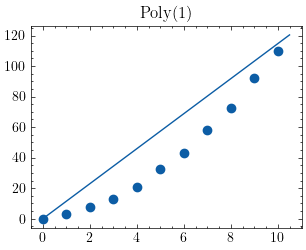

In [7]:
plt.plot(xs, p_1(xs))
plt.scatter(x, y)
plt.title("Poly(1)")
plt.show()

In [8]:
p_2 = poly_reg(2, xs, ys)
p_2

Polynomial([0.        , 0.77015814, 1.01878869], domain=[-1,  1], window=[-1,  1], symbol='x')

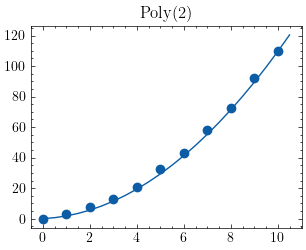

In [9]:
plt.plot(xs, p_2(xs))
plt.scatter(x, y)
plt.title("Poly(2)")
plt.show()

In [10]:
p_20 = poly_reg(20, xs, ys)
p_20

Polynomial([ 0.00000000e+00,  4.54198275e-06,  2.53701210e-08,  6.14520923e-08,
        2.19260615e-07,  7.38680814e-07,  2.33124637e-06,  6.78428960e-06,
        1.77257235e-05,  3.97742108e-05,  7.05906049e-05,  8.12377664e-05,
        1.64290791e-05, -7.94166975e-05,  4.45882175e-05, -1.22874238e-05,
        2.00259256e-06, -2.03045774e-07,  1.26410431e-08, -4.44076101e-10,
        6.75838435e-12], domain=[-1,  1], window=[-1,  1], symbol='x')

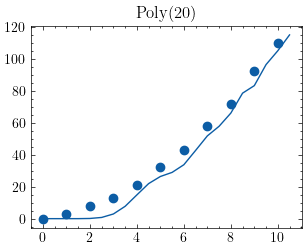

In [11]:
plt.plot(xs, p_20(xs))
plt.scatter(x, y)
plt.title("Poly(20)")
plt.show()

## Underfitting and overfitting

In [12]:
m = 30
errors = np.zeros(m)
for j in range(m):
    i = j + 1
    poly_i = poly_reg(i, xs, ys)
    err = (ys - poly_i(xs))**2
    errors[j] = err.sum()

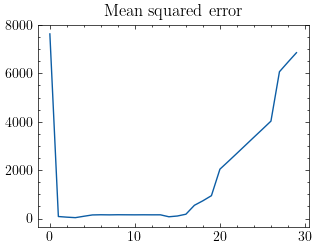

In [13]:
plt.plot(errors)
plt.title("Mean squared error")
plt.show()